# Intermediate Python I

Please indicate your name below, since you will need to submit this notebook completed latest the day after the datalab.

Don't forget to save your progress during the datalab to avoid any loss due to crashes.

In [ ]:
name='Alexander Hedene'

During the previous datalab we have learnt about the basic built-in features of python: we learnt about variable and data types, loops and conditions. We also mentioned before that there are thousands of open source packages which can be imported to python. Several of these libraries are considered rather standard (and preinstalled when using anaconda). If we would like to create a package executing less standard tasks (for example parsing nuclear data formats), it is worth browsing the world wide web for pre-existing solutions before reinvintenting the wheel. There is for example the nuclear engineering toolkit called Pyne which provides a lot of functionality relevant for nuclear scientists. 

In the next two datalabs we are going to try some standard libraries, and get acquainted with various data formats.

Libraries reviewed today are:
- numpy which provides data containers and functions to perform numerical analysis, matrix operations, linear algebra and a lot more.
- matplotlib which provides visualization tools from simple 2D plots to advanced 3D visualizations
- scipy which provides scientific tools, for example fitting, ODE solvers, numerical integration
- re which allows using regular expressions. A regular expression (often called regex or regexp) is a search pattern specified as a sequence of characters. The `re` package provides regexp operations. 

It is neither possible nor necessary to review all the features of these packages, rather we would like to provide you with the basic terminology and to cover the basic functionality of these packages. That said, what is imporant for now is to know about these packages, familiarize yourself with the basic principles of these tools. Later, in other exercises we are going to refer to functions and methods of these libraries. It is not required to keep all functionality of these libraries in your head, as you will advance you will often find yourself googling for solutions, reading through stackoverflow entries, and then with your basic understanding and the knowledge of the terminology you will be able to adapt the proposed solutions to your own needs.

There are several other mainstream libraries of python which we will not cover at all in this course. For example symPy allows for symbolic operations, or sklearn provides an interface to machine learning models. Nevertheless, once you got a feeling for using python, it will be relatively easy for you to use any other package according to your future needs.



## Numpy

We saw before how to organize data in arrays called lists. Lists are extremely flexible, they can store data of different types (eg. `[1,'one',True]`), and one can easily create multidimensional lists, or matrices (eg. `[[1,2,3],[4,5,6],[7,8,9]]`). Nevertheless, in some sense this flexibility is also a drawback. If we perform operations on a list (for example by looping over its elements, and performing some simple mathetmatics), Python needs to check the type of each element. For a compiled code, when the type is declared beforehand such checks are not needed, hence it runs faster. Numpy (numerical python) offers a more efficient data structure called *numpy array* (which stores elements of the same type) and provides related data operations. Numpy arrays are important building blocks of several other tools (eg. data science applications), and they make life easier, hence it is valuable to understand how to use them.

Besides the numpy array, numpy contains a lot of useful functions and libraries (operations and linear algebra on the arrays, random number generators etc), which we will not cover now, but we will use them later on. 

The common way to import numpy is with 

In [2]:
import numpy as np

Here we state that we want to `import numpy`, and later we will refer to it as `np`, meaning that we can access functions from numpy with `np.functionName()`. One can use different reference names as well, or just simply `import numpy`, and refer to functions with `numpy.functionName()`. (We could import directly functions from numpy, for example `from numpy import cos`, or we could import everything from numpy with `from numpy import *`, however this is generally not adviced since some libraries might have functions with the same name, like there is a `cos` implementation both in `math` and numpy, and the two implementations do not have the same functionality (eg. the numpy version can use lists as an input, the math version cannot).

Let's look at numpy arrays.

What would you expect when you execute this?

In [5]:
a=np.array([1,2,3])
a[0]=2.3
a

array([2, 2, 3])

In [8]:
b=np.array([0,1.2,'one'])
print(b)
b[0]=42.0
b

['0' '1.2' 'one']


array(['42.0', '1.2', 'one'], dtype='<U32')

In the first case, python interprets the definition as the array only stores integers. Upon changing an element it will convert the float to an integer. You have to be careful, since we saw that in normal python a list like `[0,0,0]` can be updated with floats, but `np.array([0,0,0])` cannot. Nevertheless we will see that initializing an array with zeros should be done with `np.zeros()`.

In the second case essentially the same thing happens. Python cannot interpret `'one'` as a number, instead it broadcasts the string type to all other elements. Upon modifying an element, it is automatically converted to string.

One can however directly give a type to a numpy array (although when working with floats it is often just better to write out the decimals).

In [7]:
c=np.array([1, 2, 3], dtype='float32')
print(c)
c[0]=2.3
c

[1. 2. 3.]


array([2.3, 2. , 3. ], dtype=float32)

Numpy provides several functions to initialize arrays (even 2D), which are probably familiar to Matlab users:

In [9]:
a=np.zeros(3)
print(a)
A=np.zeros((3,3))
print(A)
b=np.ones(3)
print(b)
c=np.linspace(-5,5,11)
print(c)

[0. 0. 0.]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[1. 1. 1.]
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


In [10]:
print(A.shape)
print(len(c))

(3, 3)
11


Indexing of numpy arrays is similar as for lists, however for matrices we reach the elements with comma separated indices.

In [11]:
B=np.arange(9)
print(B)
print(B[2:5])
print(B[2:8:2]) #start:stop:step

[0 1 2 3 4 5 6 7 8]
[2 3 4]
[2 4 6]


In [12]:
C=B.reshape((3,3))
print(C)
print(C[:,1]) #second column
print(C[1,:]) #second row
print(C[1,1])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[1 4 7]
[3 4 5]
4


With numpy arrays we can easily perform aggregations, see the examples below. This is powerful, when needed to be performed on large arrays.

In [13]:
print(np.min(c))
print(np.max(c))
print(np.sum(c))
print(np.mean(c))

-5.0
5.0
0.0
0.0


And we can perform operations with the arrays, and apply mathematical functions on the arrays. Notice that doing the same with lists would require loops.

In [14]:
print(c+100)
print(c+c)
print(3*c)
print(np.sin(c))

[ 95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105.]
[-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
[-15. -12.  -9.  -6.  -3.   0.   3.   6.   9.  12.  15.]
[ 0.95892427  0.7568025  -0.14112001 -0.90929743 -0.84147098  0.
  0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427]


What makes numpy arrays even more powerful is that it is possible to mask them, ie. we can filter arrays based on conditions of other arrays

In [15]:
energy=np.logspace(-3,7,20) #20 values between 1e-3 and 1e7
energy

array([1.00000000e-03, 3.35981829e-03, 1.12883789e-02, 3.79269019e-02,
       1.27427499e-01, 4.28133240e-01, 1.43844989e+00, 4.83293024e+00,
       1.62377674e+01, 5.45559478e+01, 1.83298071e+02, 6.15848211e+02,
       2.06913808e+03, 6.95192796e+03, 2.33572147e+04, 7.84759970e+04,
       2.63665090e+05, 8.85866790e+05, 2.97635144e+06, 1.00000000e+07])

In [16]:
values=1/energy
values

array([1.00000000e+03, 2.97635144e+02, 8.85866790e+01, 2.63665090e+01,
       7.84759970e+00, 2.33572147e+00, 6.95192796e-01, 2.06913808e-01,
       6.15848211e-02, 1.83298071e-02, 5.45559478e-03, 1.62377674e-03,
       4.83293024e-04, 1.43844989e-04, 4.28133240e-05, 1.27427499e-05,
       3.79269019e-06, 1.12883789e-06, 3.35981829e-07, 1.00000000e-07])

In [17]:
energy<1.0

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [18]:
values[energy<1.0]

array([1000.        ,  297.63514416,   88.58667904,   26.36650899,
          7.8475997 ,    2.33572147])

In [19]:
values*(energy<1.0) #we multiply with bools, so ones and zeros. Keeps the same shape.

array([1000.        ,  297.63514416,   88.58667904,   26.36650899,
          7.8475997 ,    2.33572147,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ])

Last, we can mention that numpy also has some functions to read data in columns. For example if we open the file '2-U235_xs_cap.txt', we can see that it contains two columns of data:

```
    Incident energy (ev)	cross section (barn)
    1.0E-5	5960.097
    1.0625E-5	5782.129
    1.125E-5	5619.206
    1.1875E-5	5469.321
    1.25E-5	5330.822
    1.375E-5	5082.714
    1.5E-5	4866.305
    1.625E-5	4675.372
    1.75E-5	4505.28
    1.875E-5	4352.493
    ...
```

We do not need to write a parser to read this file, instead we can use the `np.loadtxt()` function.

In [5]:
u235=np.loadtxt('02-sample.txt',skiprows=1) #we skip the first row, which is a header
u235

array([[1.000000e-05, 5.960097e+03],
       [1.062500e-05, 5.782129e+03],
       [1.125000e-05, 5.619206e+03],
       ...,
       [2.900000e+07, 2.860958e-04],
       [2.950000e+07, 2.811358e-04],
       [3.000000e+07, 2.763430e-04]])

As said before, numpy has a lot of other functionality what we cannot cover in one single datalab, but later we will cover the ones needed for solving the exercises.

## Matplotlib

We saw previously how to do some mathematics with Python, but of course as aspiring scientists or engineers we would like to present our results visually as well. Matplotlib is a multi-platform data visualization library. It is designed to work with Numpy arrays. It will allow us to create 2D and 3D plots, and we can even create simple graphics as we will see. Matplotlib works well on several operating systems and it supports several output formats.

The basic syntax of Matplotlib will feel familiar to Matlab users, and indeed it is straightforward to create basic plots. However, creating more difficult plots can feel sometimes frustrating.

Besides Matplotlib, an other mainstream visualization library called Seaborn is also available in the Python universe. We are not going to use this in the course.

### Simple 2D plot

Let us first simply look at the basic features by plotting the exponential decay curve. The most simple example would look like this. 

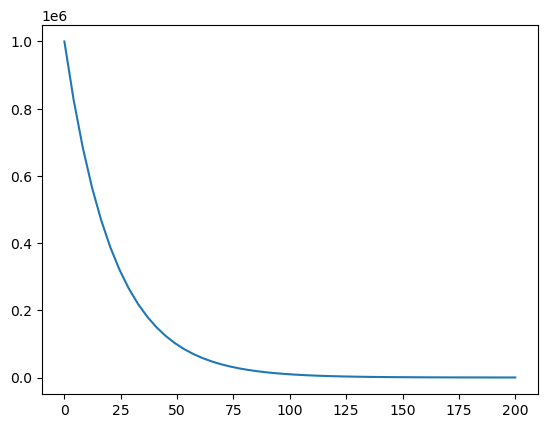

In [3]:
import matplotlib.pyplot as plt

Thalf=14.9 #days
lam=np.log(2)/Thalf #1/days
N0=1e6 #number of atoms 
time=np.linspace(0,200,50) #in days
atoms=N0*np.exp(-lam*time)

plt.figure()
plt.plot(time,atoms)
plt.show()

As an other simple example we can plot the content of the previously read file (which in fact is the neutron capture cross section of uranium-235. Here we use the `plt.loglog` function to have a logarithmic scale, and we set the labels of the axes.

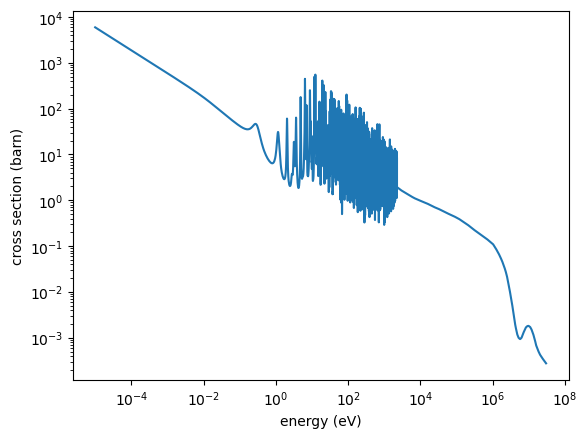

In [6]:
plt.figure()
plt.loglog(u235[:,0],u235[:,1])
plt.xlabel('energy (eV)')
plt.ylabel('cross section (barn)')
plt.show()

In the following we will show how to customize parts of the figure. With `plt.figure` we create a canvas (and can set a size), then `plt.plot` will plot the specified X and Y arrays against each other. Here we can set the color, the type of the curve (solid or dashed etc.), the markers, and marker size or line width (`lw`), and we can add a label. If more `plt.plot` commands would be included, more curves would appear on the canvas. We can include a label, which will be shown if a legend is created (`plt.legend`)

We can set the label on the x and y axis (`plt.xlabel`, `plt.ylabel`), and a title (`plt.title`). LaTeX expressions can be used where strings are given to describe content (`r'$a=3$'` will be rendered as LaTeX, `a=3` would be rendered as a normal string). With `xlim`, `ylim`, `xticks` and `yticks` we can set the boundaries of the plot and overwrite the default tick positions and labels.

We can include a grid (`plt.grid`), and we can we can include custom horizontal and vertical lines (`plt.axhline` and `plt.axvline`).

Note that all these commands are optional, and they have further parameters to tune. Almost anything is possible here. Don't be afraid to google, or ask ChatGPT for solutions when you want to make your plots pretty.

The `matplotlib.pyplot` library has several more plotting options for scatter plots, errorbars, histograms, barplots, charts etc. You can also change the axis to logarithmic (and there are functions readily available for this which might sound familiar to previous Matlab users: `plt.loglog`, `plt.semilogx`, `plt.semilogy`. We will use some of these later in the course. 

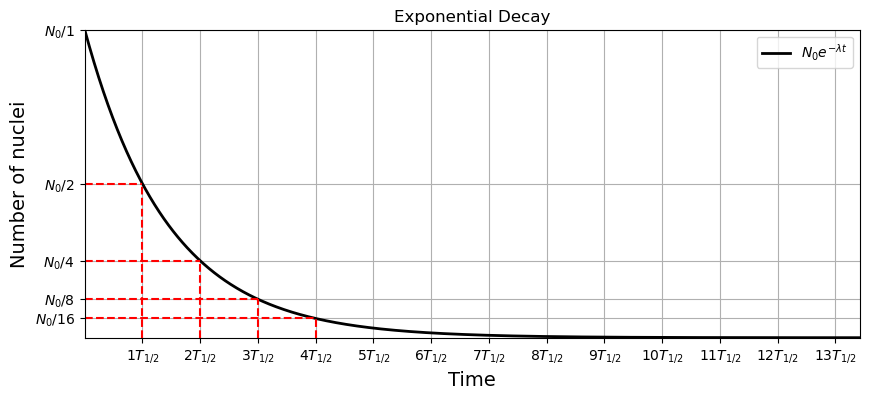

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Thalf=14.9 #days
lam=np.log(2)/Thalf #1/days
N0=1e6 #number of atoms 

time=np.linspace(0,200,1000) #in days

plt.figure(figsize=(10,4))
plt.plot(time,N0*np.exp(-lam*time),'k-',lw=2,label=r'$N_0e^{-\lambda t}$')
plt.title('Exponential Decay')
plt.xlabel('Time',fontsize=14)
plt.ylabel('Number of nuclei',fontsize=14)


plt.xticks([(i)*Thalf for i in range(1,14)],        #list of values where ticks are added
           [r'$%dT_{1/2}$'%i for i in range(1,14)]) #list of strings written at the ticks

plt.yticks([N0/i for i in [1,2,4,8,16]],            #list of values where ticks are added
           [r'$N_0/%d$'%i for i in [1,2,4,8,16]])   #list of strings written at the ticks

plt.xlim(0,200.0)
plt.ylim(0,N0)

plt.grid()
plt.axhline(N0/2,xmin=0,xmax=Thalf/200.0,color='r',ls='--') #xmin and max between 0 and 1; ls: linestyle
plt.axvline(Thalf,ymin=0,ymax=1/2,color='r',ls='--')

plt.axhline(N0/4,xmin=0,xmax=2*Thalf/200.0,color='r',ls='--') #xmin and max between 0 and 1
plt.axvline(2*Thalf,ymin=0,ymax=1/4,color='r',ls='--')

plt.axhline(N0/8,xmin=0,xmax=3*Thalf/200.0,color='r',ls='--') #xmin and max between 0 and 1
plt.axvline(3*Thalf,ymin=0,ymax=1/8,color='r',ls='--')

plt.axhline(N0/16,xmin=0,xmax=4*Thalf/200.0,color='r',ls='--') #xmin and max between 0 and 1
plt.axvline(4*Thalf,ymin=0,ymax=1/16,color='r',ls='--')

# Notice that we could have used a for loop for this part
#for i in range(1,5):
#    plt.axhline(N0*0.5**i,xmin=0,xmax=i*Thalf/200.0,color='r',ls='--') #xmin and max between 0 and 1
#    plt.axvline(i*Thalf,ymin=0,ymax=0.5**i,color='r',ls='--')

plt.legend()
#plt.savefig('myfigure.png',dpi=300)
plt.show()

### Simple 2D graphics

Matplotlib allows us to create graphics as well, we can define Polygons, Circles etc and place them on the canvas. We can also combine these graphics elements with data plots.

In the following we will want to define a function which becomes zero on the edges of a hexagon (let's consider we have a hexagonal reactor, and the neutron population becomes zero on the boundary). We can use matplotlib to draw a hexagon to define our problem. Note, that here we also use `plt.annotate` to place text on our canvas, and we switched off the visibility of the right and top axes.

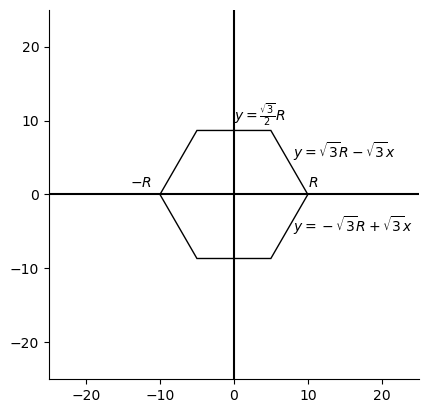

In [9]:
import matplotlib.pyplot as plt
R=10.0
fig, ax = plt.subplots()
#defining the hexagon through its corners.
polygon=plt.Polygon([[-R,0.0],[-1/2*R,np.sqrt(3)/2*R],[1/2*R,np.sqrt(3)/2*R],
                    [R,0.0],[1/2*R,-np.sqrt(3)/2*R],[-1/2*R,-np.sqrt(3)/2*R]],facecolor='white',edgecolor='black')
ax.add_artist(polygon)
plt.axvline(0.0,color='black') #we draw a vertical line for y axis
plt.axhline(0.0,color='black') #we draw a horizontal line for x axis
plt.annotate(r'$y=\sqrt{3}R-\sqrt{3}x$',(R*0.8,R/2)) #write this expression to that location
plt.annotate(r'$y=-\sqrt{3}R+\sqrt{3}x$',(R*0.8,-R/2))
plt.annotate(r'$-R$',(-R*1.4,1))
plt.annotate(r'$R$',(R*1.,1))
plt.annotate(r'$y=\frac{\sqrt{3}}{2}R$',(0.,R))
plt.xlim(-R*2.5,R*2.5) #limit the x-axis between -R*2.5, R*2.5
plt.ylim(-R*2.5,R*2.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().spines['right'].set_visible(False)#Switch off frame on right
plt.gca().spines['top'].set_visible(False)#Switch off frame on top
plt.show()

### Simple 3D plot

We could construct a function from sines or cosines which disappears at the edge of a hexagon with a width $R$. One possible solution is

$$f(x,y)=\cos\big(\frac{\pi}{\sqrt{3}R}y\big)\cdot \cos\big(\frac{\pi}{2\sqrt{3}R}(y+\sqrt{3}x)\big)\cdot \cos\big(\frac{\pi}{2\sqrt{3}R}(y-\sqrt{3}x)\big)$$.

We first define a function `hexFunc()`, which will return zero if we are outside of the hexagon, and the mathematical function's value if we are inside. For this we will use a mask. **Note**: the backslash `\` character  tells the python interpreter that the code is continued in the next line, this improves legibility.

Then we can create a meshgrid, and evaluate the function at each of the grid points. Note that how concise numpy is, we didn't need to write any loop to evaluate the function at several grid points. Finally we can plot the surface with the `plot_surface` function. 

We can also plot a 2D projection/representation of the surface: with `contour` and `contourf` we can visualize contour lines and filled contour lines. With `imshow` the values are considered to be pixels of an image.

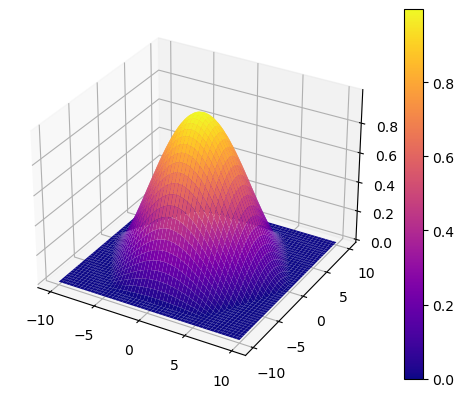

In [10]:
def hexFunc(x,y,R):
    """Function which disappears on the edge of a hexagon
    
    Parameters
    ----------
    X : ndarray
        meshgrid X values.
    Y : ndarray
        meshgrid Y values
    R : size of the hexagon
    """
    z = np.zeros(x.shape)
    mask = (y<=np.sqrt(3)/2*R) *  \
           (y>=-np.sqrt(3)/2*R) * \
           (y<=np.sqrt(3)*R-np.sqrt(3)*x) *  \
           (y>=-np.sqrt(3)*R-np.sqrt(3)*x) * \
           (y<=np.sqrt(3)*R+np.sqrt(3)*x) *  \
           (y>=-np.sqrt(3)*R+np.sqrt(3)*x)
    z[mask] =np.cos(y[mask]*np.pi/np.sqrt(3)/R)*\
             np.cos((y[mask]+np.sqrt(3)*x[mask])*np.pi/2/np.sqrt(3)/R)*\
             np.cos((y[mask]-np.sqrt(3)*x[mask])*np.pi/2/np.sqrt(3)/R)
    return z

import numpy as np

R=10 #cm
X = np.linspace(-R, R, 1000)
Y = np.linspace(-R, R, 1000)
Xn, Yn = np.meshgrid(X, Y)

Z=hexFunc(Xn,Yn,R)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf=ax.plot_surface(Xn, Yn, Z, cmap="plasma")
fig.colorbar(surf)
plt.show()

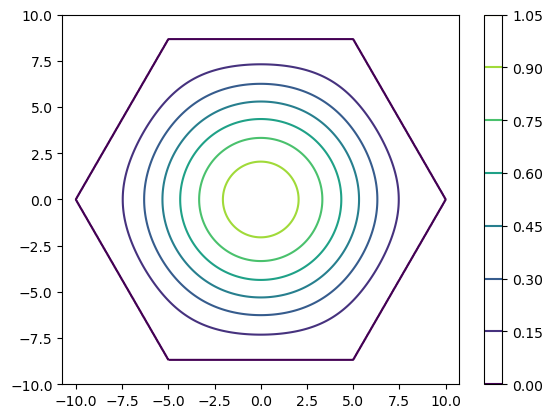

In [11]:
plt.figure()
plt.contour(Xn,Yn,Z)
plt.axis('equal')
plt.colorbar()
plt.show()

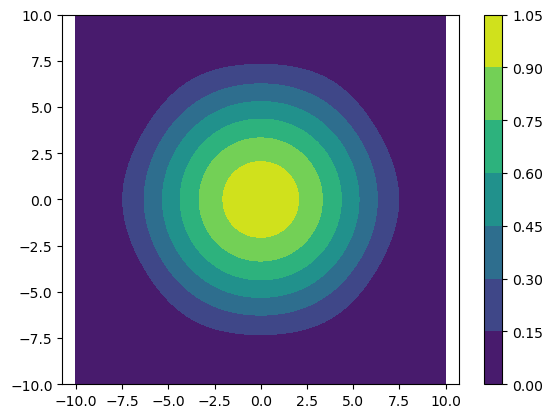

In [12]:
plt.figure()
plt.contourf(Xn,Yn,Z)
plt.axis('equal')
plt.colorbar()
plt.show()

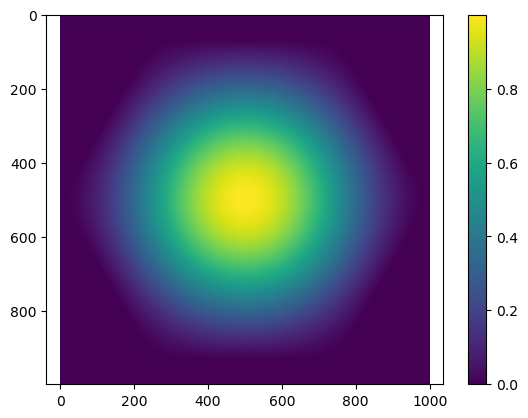

In [13]:
plt.figure()
plt.imshow(Z)
plt.axis('equal')
plt.colorbar()
plt.show()

## Scipy

The name Scipy is a bit confusing: in a way Scipy is a whole ecosystem including numpy, matplotlib, pandas and other packages, but there is also a package called Scipy within this ecosystem. Probably one could spend a whole course just on covering the functionality of Scipy. It provides solutions to most of the engineering/science problems (fitting, optimization, integration, Fourier transform etc). Here we just use one illustrative example on how to solve simple coupled ODE systems, initial value problems, with it by using the `solve_ivp` function from the `scipy.integrate` package, and later when we need some other functionality we will introduce other functions.

Let's solve the simple decay chain when a parent nuclide decays into a radioactive daughter: $P\rightarrow D \rightarrow$, with decay constants $\lambda_P$ and $\lambda_D$. The differential equations characterizing this process are

$$\frac{dN_P}{dt}=-\lambda_P N_P$$

$$\frac{dN_D}{dt}=\lambda_P N_P-\lambda_D N_D$$

with initial condition $N_P(t=0)=N_P(0)$ and $N_D(t=0)=0$.

The same system could be written in matrix form:

\begin{equation}
\frac{d}{dt}
\begin{pmatrix}
N_P \\ N_D
\end{pmatrix}
=
\begin{pmatrix}
-\lambda_P & 0 \\ \lambda_P & -\lambda_D
\end{pmatrix}
\begin{pmatrix}
N_P \\ N_D
\end{pmatrix}
\end{equation}

or with using vectors ($N=(N_P \: N_D)$) and matrices

\begin{equation} 
\dot N=AN
\end{equation}

We will use the `scipy.integrate.solve_ivp` function to solve numerically this system (note that we do not import the whole scipy library, only this function, and remember that you can access the documentation with `?solve_ivp`) in the form of $\dot y=Ay$. The solver requires a function in the form `myDerivative(t,y)` which describes the derivative $Ay$. Optinally this function can have some extra arguments. Then this derivative function is passed to `solve_ivp`, along with the time span (time window in which the integration is performed), the initial conditions and the times at which $y$ is evaluated, and any arguments (`args`) needed by the derivative function.

`sol=solve_ivp(myDerivative,(Tstart,Tend),[InitialConditions],t_eval=TimesArray,args=(arguments))`

In [14]:
from scipy.integrate import solve_ivp

?solve_ivp

Signature:
solve_ivp(
    fun,
    t_span,
    y0,
    method='RK45',
    t_eval=None,
    dense_output=False,
    events=None,
    vectorized=False,
    args=None,
    **options,
)
Docstring:
Solve an initial value problem for a system of ODEs.

This function numerically integrates a system of ordinary differential
equations given an initial value::

    dy / dt = f(t, y)
    y(t0) = y0

Here t is a 1-D independent variable (time), y(t) is an
N-D vector-valued function (state), and an N-D
vector-valued function f(t, y) determines the differential equations.
The goal is to find y(t) approximately satisfying the differential
equations, given an initial value y(t0)=y0.

Some of the solvers support integration in the complex domain, but note
that for stiff ODE solvers, the right-hand side must be
complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
To solve a problem in the complex domain, pass y0 with a complex data type.
Another option always available is to rewrite your pro

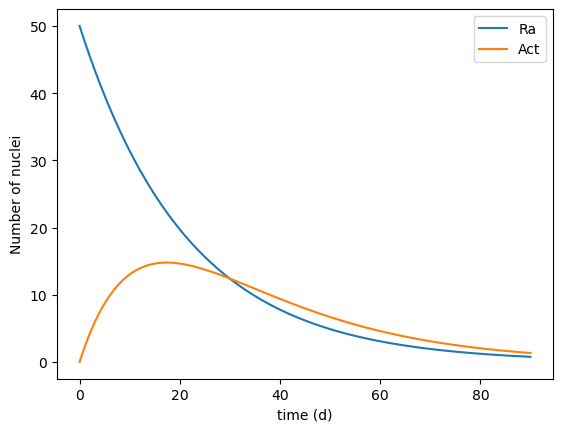

In [15]:
def derivDaughter(t,y,lp,ld):
    A=np.array([[-lp,0.0],[lp,-ld]])
    return np.dot(A,y)

TP=14.9 #d, parent, and all time units are considered to be in days 
lP=np.log(2)/TP
TD=9.9
lD=np.log(2)/TD

N0=50
Tstart=0.0
Tend=90.0 #days
Neval=1001
T_eval=np.linspace(Tstart,Tend, Neval)
sol=solve_ivp(derivDaughter,(Tstart,Tend),[N0,0.0],t_eval=T_eval,args=(lP, lD))

plt.figure()
plt.plot(sol.t,sol.y[0],label='Ra')
plt.plot(sol.t,sol.y[1],label='Act')
plt.xlabel('time (d)')
plt.legend()
plt.ylabel('Number of nuclei')
plt.show()

## find() and re

It is often required in science and engineering applications that one parses various files (for example outputs produced by a software, or data files), and need to extract some specific information. 

Python provides a basic string method (https://www.w3schools.com/python/python_ref_string.asp), to find strings within strings. Take a look at the code below. Let's assume that some software gives the final results in the following format, and we are interested in the 'keff' value. We could locate the number by matching the `=` sign, and the word `with`. Of course this is not perfect. What happens if a word or substring appears more than once?

In [16]:
resuStr='the final estimated keff = 1.04562 with an estimated standard deviation of 0.00057'
i=resuStr.find('=')
print(i)
j=resuStr.find('with')
print(j)
print(float(resuStr[i+1:j]))

25
35
1.04562


A more accurate solution to problems like this is to use regular expressions. Regular expressions are not a part of python, it is an independent "language", which allows the description of a search pattern as a string. Nevertheless, python has a package `re` which let's python users apply regexp. Hardcore geeks probably know by heart all the possible regexp patterns, and I certainly advice you to [read up on them](https://www.rexegg.com/regex-quickstart.html), nevertheless for this course we will only need to read numbers from strings. And you can most often survive by googling "regexp integer within string" or similar phrases depending on your application.

One function of the `re` package is `re.findall`, the first input should be a regular expression as a string, and the second is the string in which you would like to perform the search. Take the regular expression below, which will match floating point numbers. The pattern `[+-]?\d+\.\d+` encodes a floating point number: in `[+-]?` the ? indicates zero or one occurence of the preceding element, which in this case is one of the characters in the `[]`. Outside of the bracket, the + indicates one or more  occurance of the preceding element, and `\d` indicates a digit, so `\d+` will match one or more digits. In total `\d+\.\d+` will look for one or more digits followed by a floating point and followed by one or more digits. This pattern will not match numbers written as '1.' or '.9932'.

In [17]:
import re

re.findall('[+-]?\d+\.\d+',resuStr)

['1.04562', '0.00057']

An other typical example a nuclear engineer faces often is that you'll need to split a string (for example the name of a nuclide), to get the symbol and the mass number of the nuclide.

In [18]:
myNuc='U238'

re.split('(\d+)', myNuc)

['U', '238', '']

# Exercises 

## 1

Construct a function $f(x,y)$ which becomes zero at the edges of a rectangle centered around the origin and with a side length of $a$. First create a 2D graphic representing the rectangle, and annotate one vertical and one horizontal side by giving the equation of the side. Then, use `plot_surface` and `contour` to visualize the function. 

Include the equation of the surface here with latex code:

And write your function and code for plotting below.

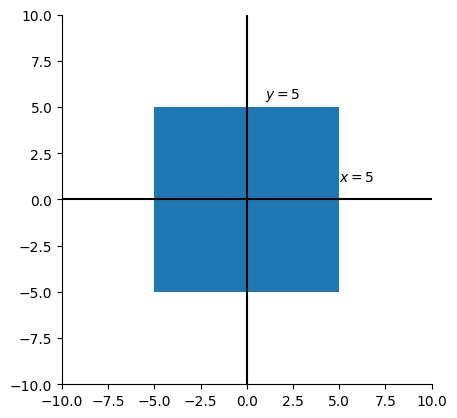

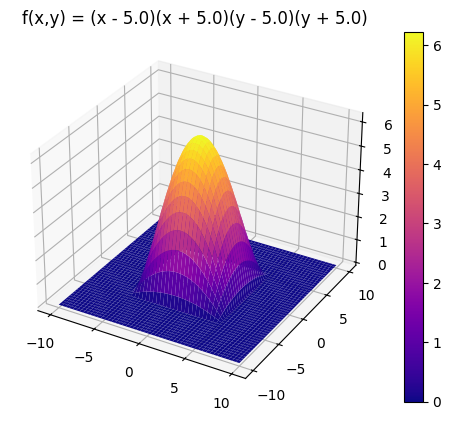

In [3]:
def f(x,y):
    """Function which disappears on the edge of a rectangle
    
    Parameters
    ----------
    X : ndarray
        meshgrid X values.
    Y : ndarray
        meshgrid Y values
    a : size of the rectangle sides
    """
    a = 10

    z = np.zeros(x.shape)
    mask =  (y <= a/2) * \
            (y >= -a/2) * \
            (x <= a/2) * \
            (x >= -a/2)
    z[mask] =   (x[mask] - a/2) * \
                (x[mask]+a/2) * \
                (y[mask] - a/2)/10 * \
                (y[mask]+a/2)/10
    return z

import numpy as np
import matplotlib.pyplot as plt

a =10 #cm
X = np.linspace(-a, a, 1000)
Y = np.linspace(-a, a, 1000)
Xn, Yn = np.meshgrid(X, Y)

Z=f(Xn,Yn)


fig, ax = plt.subplots()
rectangle = plt.Rectangle([-a/2, -a/2], a,a)
ax.add_artist(rectangle)
plt.axvline(0.0,color='black') #we draw a vertical line for y axis
plt.axhline(0.0,color='black') #we draw a horizontal line for x axis
plt.annotate(r'$x= 5$',(a/2,1)) #write this expression to that location
plt.annotate(r'$y = 5$',(1,a/2+1/2))
plt.xlim(-a,a) #limit the x-axis between -R*2.5, R*2.5
plt.ylim(-a,a)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().spines['right'].set_visible(False)#Switch off frame on right
plt.gca().spines['top'].set_visible(False)#Switch off frame on top
plt.show()



fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf=ax.plot_surface(Xn, Yn, Z, cmap="plasma")
plt.title(f"f(x,y) = (x - {a/2})(x + {a/2})(y - {a/2})(y + {a/2})")
fig.colorbar(surf)
plt.show()

## 2

Consider the following decay chain $U-234 \rightarrow Th-230 \rightarrow Ra-226 \rightarrow Rn-222 \rightarrow$, which is part of the U-238 decay serie. The alpha decays have the following half-lifes: 245.5ky, 75.38ky, 1602y and 3.82d.  Use scipy, and matplotlib to plot the number of nuclides and the activity between 0 and 15 kyears if $N_{U-234}(t=0)=5000000$, and the daughters are not present at $t=0$.

- Inspect the half-lifes, what do you expect, what can cause numerical issues in this case?
- What is your expectation on how will the activity of Ra-226 and Rn-222 compare to each other?

In [ ]:
# Since Rn-222 have a much lower half-life there needs to be a lot of Ra-226 to be able to start to accumilate Rn-222. This will probably not be the case.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
def buildMatrix(lam):
    A=np.zeros([len(lam),len(lam)])
    A[-1,-1] = -lam[-1]
    for i in range(len(lam)-1):
        A[i,i] = -lam[i]
        A[i+1, i] = lam[i]
    return A
    
def derivDaughter(t,y,A):
    return np.dot(A,y)


N0 = 5e+6
T = np.array([245.5*1000*365, 75.38*1000*365, 1602*365, 3.82]) #d, parent, and all time units are considered to be in days 
lamd = np.log(2)/T
y = np.array([N0,0,0,0])

T_start = 0
T_end = 15e+3*365
Neval = int(T_end/10)+1
T_eval = np.linspace(T_start,T_end, Neval)
A = buildMatrix(lamd)
sol=solve_ivp(derivDaughter,(T_start,T_end),y,t_eval=T_eval,args=(A,))

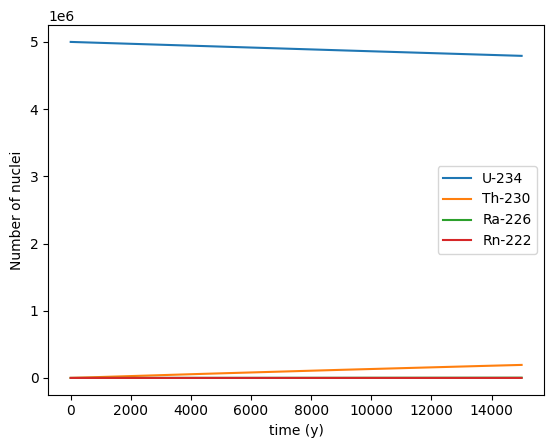

In [2]:
plt.figure()
plot_vec = [0,1,2,3]
name_vec = ["U-234", "Th-230", "Ra-226", "Rn-222"]
for i in plot_vec: 
    plt.plot(sol.t/365,sol.y[i],label=name_vec[i])

plt.xlabel('time (y)')
plt.legend()
plt.ylabel('Number of nuclei')
plt.show()

## 3

The minimum energy required to disassemble the nucleus of an atom into its components is the binding energy. In this exercise you are going to compute the binding energy per nucleon for several nuclides in two ways:

1. based on the relative atomic mass of the nuclides
2. based on a semi-empirical formula.

If we substract the mass of the nucleus from the mass of the nucleons and express it in energy unit we get the binding energy:

$B(A,Z)=[Z\cdot m_p+(A-Z)\cdot m_n-M(A,Z)]c^2$

For a given nuclide one can estimate the binding energy with the semi-empirical Bethe–Weizsäcker formula, which has various forms in literature. Here you can use the following form:

$B(A,Z)=15.75A-94.8\frac{(A/2 - Z)^2}{A}-17.8A^{2/3}-0.71Z^2A^{-1/3}+34\delta A^{-3/4}$

where $\delta = 1$ for even-even nuclei, $\delta = -1$ for odd-odd nuclei and $\delta = 0$ otherwise.

(Note: that all terms in the formula have a physical meaning: volume term, assymmetry term, surface term, Coulomb term and pairing term. Make sure based on the text book that you understand these).

In the first formula one can express the neutron and proton mass in unified mass units (u). Also notice, that in most tabulated data (also here) you can only look up the relative atom mass of isotopes, and not the mass of the nucleus, thus the mass of the electrons needs to be taken into account as well. The reason for this is that for high Z isotopes it is difficult to remove all the electrons, so the neutral atoms are measured instead.

You are given the relative mass (in unified mass units) of several nuclides  (downloaded from https://physics.nist.gov/cgi-bin/Compositions/stand_alone.pl?ele=&ascii=html) as a python nested dictionary `nuclides`. Dictionaries are used to store data values in key:value pairs. It is basically an unorder array with "named" columns. In this case the outer keys are nuclide identifiers, and the values are also dictionaries, with the keys being Z, A and m.

Your task is to 

1. implement two functions which calculate $\varepsilon=B(A,Z)/A$ with the two methods listed above.
2. apply the functions for the nuclides listed in `nuclides`
3. Plot the binding energy curves. Use solid line for the semi-empirical formula, and red dot markers `ro` for the results taking into account the relative mass
4. Find the nuclide with the highest binding energy per nucleon, and use `plt.annotate` to include the name of the nuclide in the figure above the corresponding marker.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
me=5.48579909070e-4 #u
mn=1.00866491588    #u
mp=1.007276466621   #u
muc2=931.49410242 #MeV

nuclides={'H2': {'Z': 1, 'A': 2, 'm': 2.01410177812},
        'H3': {'Z': 1, 'A': 3, 'm': 3.0160492779},
        'He3': {'Z': 2, 'A': 3, 'm': 3.0160293201},
        'He4': {'Z': 2, 'A': 4, 'm': 4.002603254},
        'Li6': {'Z': 3, 'A': 6, 'm': 6.0151228874},
        'O16': {'Z': 8, 'A': 16, 'm': 15.99491461957},
        'S34': {'Z': 16, 'A': 34, 'm': 33.96786701},
        'Fe56': {'Z': 26, 'A': 56, 'm': 55.9349375},
        'Ni62': {'Z': 28, 'A': 62, 'm': 61.92834537},
        'Kr84': {'Z': 36, 'A': 84, 'm': 83.9114977282},
        'Sn119': {'Z': 50, 'A': 119, 'm': 118.90331117},
        'Ti205': {'Z': 81, 'A': 205, 'm': 204.9744278},
        'U238': {'Z': 92, 'A': 238, 'm': 238.0507884}}

def BAZ(A,Z,m):
    """Function to calculate the binding energy per nucleon
    
    Parameters
    ----------
    A : int
        Mass number of nuclide
    Z : int
        Proton number of nuclide
    m : float
        Mass of the nuclide
    """
    eps=#YOUR CODE HERE
    return eps/A

def BAZ_BW(A,Z):
    """Function to calculate the binding energy per nucleon
    with the semi-empirical formula
    
    Parameters
    ----------
    A : int
        Mass number of nuclide
    Z : int
        Proton number of nuclide
    """
    #your code comes here
    return eps/A

#your code to apply these functions and to plot the results comes here.